In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel('/content/onion_data.xlsx')
df.shape

(974, 2)

In [3]:
df_pr = df.copy()
df_pr.shape

(974, 2)

In [4]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [5]:
train_data_pr = df_pr.iloc[:912]
test_data_pr = df_pr.iloc[912:]
train_data = df.iloc[:912]
test_data = df.iloc[912:]

In [6]:
test_data.shape

(62, 2)

In [7]:
from fbprophet import Prophet

In [8]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=62)
prophet_pred = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
969,2010-08-27,957.733858,621.602900,1313.251587,957.026234,958.666451,3.230789,3.230789,3.230789,-5.868459,-5.868459,-5.868459,9.099247,9.099247,9.099247,0.0,0.0,0.0,960.964647
970,2010-08-28,957.574093,602.322611,1268.356210,956.822194,958.539720,-28.625675,-28.625675,-28.625675,-35.303580,-35.303580,-35.303580,6.677904,6.677904,6.677904,0.0,0.0,0.0,928.948418
971,2010-08-29,957.414328,599.896000,1310.076000,956.642361,958.406832,2.988763,2.988763,2.988763,-0.709596,-0.709596,-0.709596,3.698359,3.698359,3.698359,0.0,0.0,0.0,960.403092
972,2010-08-30,957.254563,601.529997,1290.200785,956.459858,958.267809,9.361339,9.361339,9.361339,9.162982,9.162982,9.162982,0.198357,0.198357,0.198357,0.0,0.0,0.0,966.615902
973,2010-08-31,957.094799,592.743894,1271.483457,956.265982,958.113028,-21.294857,-21.294857,-21.294857,-17.523427,-17.523427,-17.523427,-3.771430,-3.771430,-3.771430,0.0,0.0,0.0,935.799941


In [10]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-62:]['ds'], "Pred" : prophet_pred[-62:]["yhat"]})

In [11]:
prophet_pred = prophet_pred.set_index("Date")

In [12]:
prophet_pred

,Pred
Date,
2010-07-01,883.030351
2010-07-02,856.756405
2010-07-03,820.451589
2010-07-04,848.562490
2010-07-05,852.455407
...,...
2010-08-27,960.964647
2010-08-28,928.948418
2010-08-29,960.403092


In [13]:
test_data

,Date,Arrival
912,2010-07-01,970.0
913,2010-07-02,795.0
914,2010-07-03,630.0
915,2010-07-04,815.0
916,2010-07-05,1005.0
...,...,...
969,2010-08-27,850.0
970,2010-08-28,1110.0
971,2010-08-29,995.0
972,2010-08-30,880.0


In [14]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

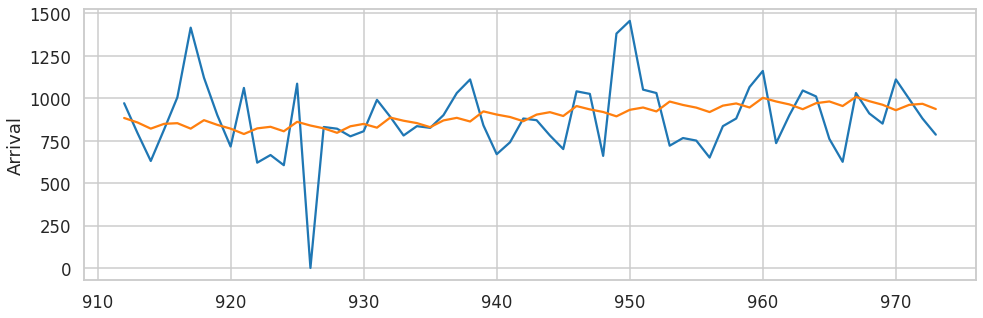

In [15]:
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Arrival"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);